In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Introdução a matrizes

Matrizes são representadas como vetores com mais dimensões (shape)

In [14]:
M_zeros = np.zeros((3,3)) # Matriz de zeros
M_ones = np.ones((3,3)) # Matriz de 1
M_full = np.full((3,3),7) # Matriz todas com 7
M_rand = np.random.rand(3,3) # Matriz com valores aleatórios
M = np.array([ # Matriz 4x3
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9,],
    [10, 11, 12]
]) 
I = np.eye(4) # Matriz identidade 4x4
D = np.diag([1,2,3,4,5],-2) # Matriz diagonal
print(D.shape)
# print(D)

D_rand = np.diag(M_rand, 1)
# print(M_rand)
# print(D_rand)
# Transformar array em matriz (reshape)
vetor = np.arange(12)
M_reshape = vetor.reshape((4,3))
print(vetor)
print(M_reshape)

# Transposição
print('Matriz M')
print(M)
print('Usando transposição: M.T')
print(M.T)

(7, 7)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
Matriz M
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Usando transposição: M.T
[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


## Operações com matrizes

Para operar matrizes, as dimensões (shape) devem ser compatíveis

In [ ]:
# Soma de Matrizes
M_soma = M_rand + M_ones # ambas MxN
print('M_random + M_ones')
print(M_soma)
print('='*50)

M_elem = M_rand * M_ones # ambas mesmo shape
print('M_random * M_ones')
print(M_elem)
print('='*50)

# Multiplicação de Matrizes
M_mult = M @ M_ones # PxN e NxQ --> PxQ
print('M @ M_ones')
print(M_mult)
print('='*50)



# Operação com vetores
M_vetor = np.array([1, 2, 3])
M_vetor_soma = M_vetor + M_ones # A ultima dimensão deve ser igual a dimensão do vetor
print('M_vetor + M_ones')
print(M_vetor_soma)
print('='*50)

# Acessar elementos
print('Primeira Linha')
print(M[0, :])
print('='*50)

print('Primeira coluna')
print(M[:, 0])
print('='*50)

print('Elemento [1, 2]')
print(M[1, 2])
print('='*50)

print('Usando slicing: M[0, 1:3]')
print(M[0, 1:3])
print('='*50)


M_random + M_ones
[[1.24102525 1.30639611 1.70608698]
 [1.49199408 1.42008691 1.08738182]
 [1.56579174 1.94362415 1.57079896]]
M_random * M_ones
[[0.24102525 0.30639611 0.70608698]
 [0.49199408 0.42008691 0.08738182]
 [0.56579174 0.94362415 0.57079896]]
M @ M_ones
[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]
 [33. 33. 33.]]
M_vetor + M_ones
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]
Primeira Linha
[1 2 3]
Primeira coluna
[ 1  4  7 10]
Elemento [1, 2]
6
Usando slicing: M[0, 1:3]
[2 3]


## Visualização de operação com matrizes

Matriz rotação:
$$
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

[-3.53553391 -2.12132034]
Ângulo entre vetores: 45.0°


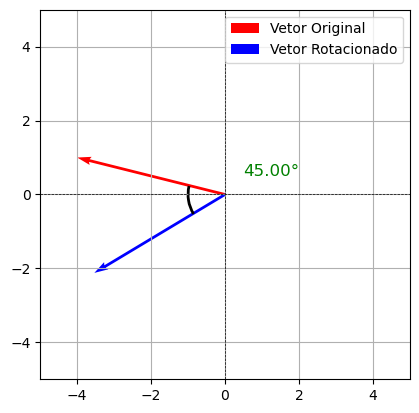

In [20]:
def matriz_rotacao(angulo, rad = False):
    if not rad:
        angulo = np.deg2rad(angulo)
    return np.array([
        [np.cos(angulo), -np.sin(angulo)],
        [np.sin(angulo), np.cos(angulo)]
    ])


vet = np.array([-4,1])
M_rot = matriz_rotacao(45)
vet_rot = M_rot @ vet
print(vet_rot)
# Verifica o angulo:
cos = vet.T @ vet_rot / (np.linalg.norm(vet) * np.linalg.norm(vet_rot))
ang_rad = np.arccos(cos)
ang = np.degrees(ang_rad)
print(f'Ângulo entre vetores: {ang}°')


# Visualização
fig, ax = plt.subplots()
plt.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vetor Original')
plt.quiver(0, 0, vet_rot[0], vet_rot[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Rotacionado')


# Desenha o arco:
# 4. Calculate the start and end angles for the arc
centro = [0,0]
theta1 = np.rad2deg(np.arctan2(vet[1] - centro[1], vet[0] - centro[0]))
theta2 = np.rad2deg(np.arctan2(vet_rot[1] - centro[1], vet_rot[0] - centro[0]))
angle_arc = Arc(centro, 2, 2, angle=ang_rad, theta1=theta1, theta2=theta2, color='black', linewidth=2)
ax.add_patch(angle_arc)

plt.text(0.5, 0.5, f'{ang:.2f}°', color='green', fontsize=12)
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

Matriz reflexão:
$$
\begin{bmatrix}
\cos(2\theta) & \sin(2\theta) \\
\sin(2\theta) & -\cos(2\theta)
\end{bmatrix}
$$

[-1.0000000e+00  1.2246468e-16]


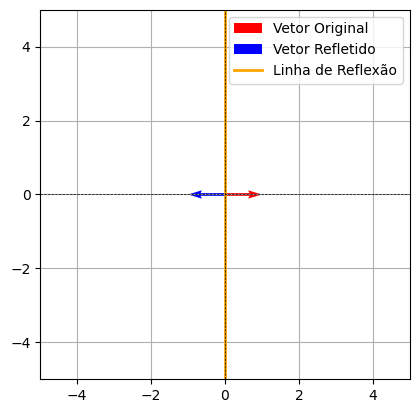

In [25]:
def matriz_reflexao(angulo, rad = False):
    if not rad:
        angulo = np.deg2rad(angulo)
    angulo *= 2
    return np.array([
        [np.cos(angulo), np.sin(angulo)],
        [np.sin(angulo), -np.cos(angulo)]
    ])


def get_linha_reflexao(angulo, xlim = [-5,5], rad=False):
    if not rad:
        angulo = np.radians(angulo)
    m = np.tan(angulo)
    b = 0
    x = np.array(xlim)
    y = m * x + b
    return x, y

angulo_reflexao = 90
vet = np.array([1,0])
M_reflexo = matriz_reflexao(angulo_reflexao)
vet_reflexo = M_reflexo @ vet

print(vet_reflexo)
# Visualização
fig, ax = plt.subplots()
plt.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vetor Original')
plt.quiver(0, 0, vet_reflexo[0], vet_reflexo[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Refletido')
plt.plot(*get_linha_reflexao(angulo_reflexao), color='orange', lw=2, label='Linha de Reflexão')

plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

## Exercício:

Projeção em um vetor é uma operação linear (verifique). Crie a matriz de projeção em um vetor qualquer.

M(u)@ v = Proj_u(v)

$$ u = (u_1, u_2), 
v = (v_1, v_2)$$

$$
\begin{bmatrix}
m_{11} & m_{12} \\
m_{21} & m_{22}
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2
\end{bmatrix}
= Proj_u(v)
$$

$$
Proj_u(v) = \frac{<u , v>}{<u , u>} u = \frac{v^Tu}{u^T u} u
$$





Matriz de Projeção
[[0.64 0.48]
 [0.48 0.36]]


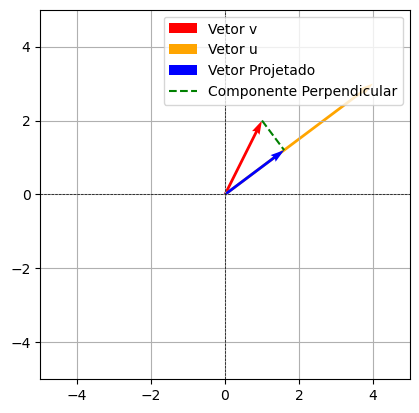

In [ ]:
def get_proj_mat(u):
    proj = np.array([
        [u[0]**2, u[0]*u[1] ],
        [u[0]*u[1], u[1]**2]
    ])
    
    proj /= np.dot(u,u)
    return proj

def get_proj_mat(u):
    proj = np.outer(u,u) / np.dot(u,u)

u = np.array([4.0, 3.0])
M_proj = get_proj_mat(u)
print('Matriz de Projeção')
print(M_proj)

vet = np.array([1, 2])
vet_proj = M_proj @ vet


# Visualização
fig, ax = plt.subplots()
plt.quiver(0, 0, vet[0], vet[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vetor v')
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Vetor u')
plt.quiver(0, 0, vet_proj[0], vet_proj[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Projetado')

plt.plot([vet[0], vet_proj[0]], [vet[1], vet_proj[1]], color='green', ls='--', label='Componente Perpendicular')

plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()